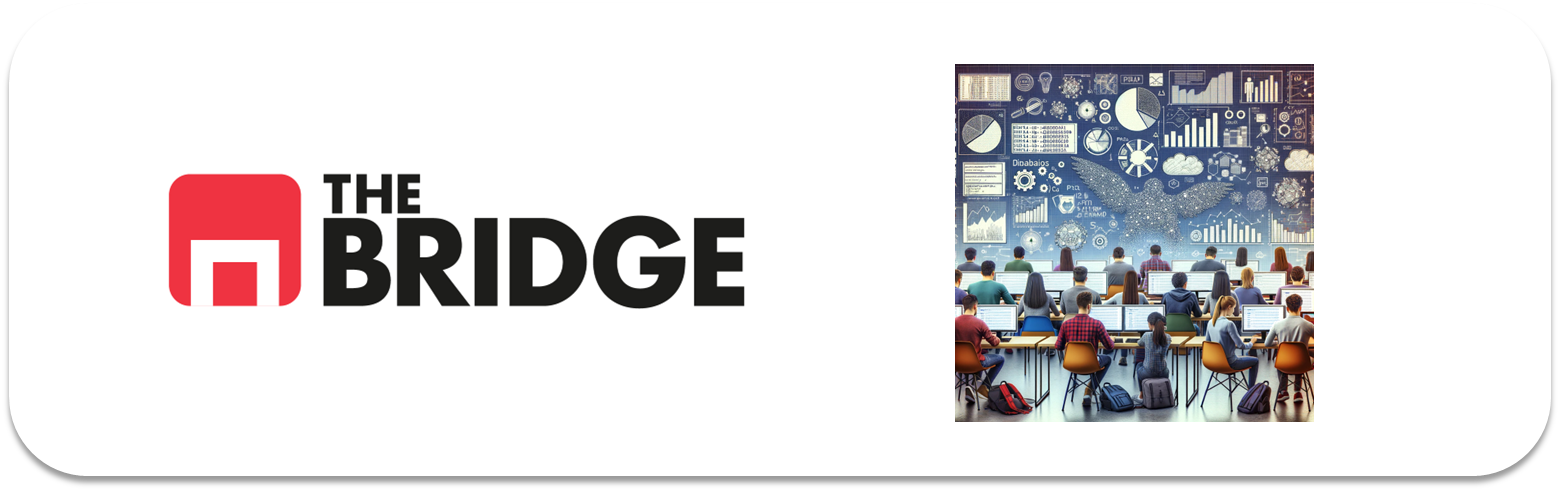

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [ ]:

#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas**

- Cargamos el Dataset y vemos las variables para entender el problema

In [3]:
df_boston = pd.read_csv(
    "data/hard_to_find/obligatoria_hard.csv",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8",
    sep='|'
)
df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


- Arriba podemos ver que no hay nulos como dice el enunciado y que todas las variables son numericas.

Ahora queremos ver la media, mediana, max, min ,etc del dataframe

In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.**

Hagamos nuestra cheklist:

- **Objetivo de negocio [V]**: (apoyar decisiones de compra‑venta, evaluar inversiones inmobiliarias, estimar precios de forma consistente y objetiva)
- **Objetivo tecnico [V]**: (El objetivo técnico es desarrollar, entrenar y evaluar un modelo de regresión supervisada capaz de predecir la variable MEDV a partir del resto de características del dataset)
- **Tipo de modelado[V]**: (supervisado, no supervisado) v (Porque tengo la varibale que me piden calcular)
- **Features [X]**: Pending
- **Target, si hay**: [V] (MEDV)
- **Tipo de problema (clasificación, regresión, etc) [V]**: (Regresion porque la variable objetivo es numerica continua)
- **Métrica de Evaluacion [X]**: Pending
- **Separación Train-Test [X]**: Pending

**La variable target sera MEDV (Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares)  y lo es porque es la unica varibale del dataset que representa el valor que queremos predecir, por esto mismo es modelo supervisado.**

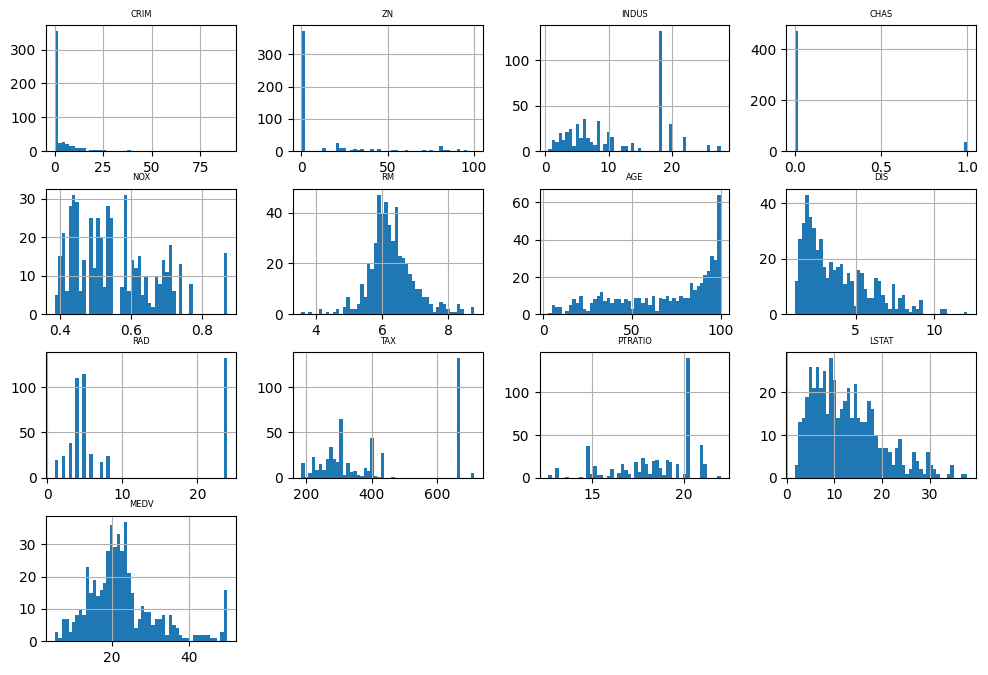

In [6]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=6)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_boston.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

¿Que quiero ver con estos graficos?

1. Distribución de cada variable
- ¿Es simétrica, sesgada, bimodal?
- ¿Tiene colas largas o valores extremos?
- ¿Está topada (como MEDV en 50)?

2. Presencia de outliers
- Valores muy alejados del resto (por ejemplo, CRIM puede tener colas largas).
- Esto afecta la regresión y puede requerir transformación o regularización.

3. Escala y orden de magnitud
- Algunas variables como ZN, RAD, TAX tienen rangos muy distintos.
- Esto justifica el uso de escalado (StandardScaler) antes de entrenar modelos como Ridge o Lasso.

4. Variables categóricas codificadas
CHAS es binaria (0 o 1), y su histograma lo confirma.
- No necesita transformación, pero conviene saber que es una dummy.

¿Por qué es útil este paso?
- Es una forma rápida de hacer EDA visual sin escribir un gráfico por variable.
- Te permite decidir si aplicar transformaciones (log, box-cox, etc.).
- Te ayuda a detectar variables que podrían tener poca varianza o estar mal distribuidas.

Analizando cada variable se sacan las sigueintes conclusiones:

1. CRIM (Tasa de criminalidad per cápita)
- Distribución muy sesgada a la derecha (cola larga).
- La mayoría de los valores son bajos, pero hay algunos extremadamente altos.
- Conclusión: posible necesidad de transformación logarítmica o regularización para mitigar el efecto de outliers.

2. ZN (Proporción de terreno residencial > 25,000 pies²)
- Distribución bimodal o concentrada en extremos.
- Muchos valores en 0 y algunos en valores altos.
- Conclusión: variable con comportamiento discreto. Puede tener sentido mantenerla como está, pero su efecto puede ser no lineal.

3. INDUS (Proporción de acres de negocios no minoristas)
- Distribución sesgada a la derecha.
- Concentración en valores bajos, pero con cola hacia valores altos.
- Conclusión: puede influir negativamente en el precio. Regularización puede ayudar.

4. CHAS (Río Charles: 0 o 1)
- Distribución binaria: dos barras, una en 0 y otra en 1.
- Conclusión: variable categórica ya codificada. No necesita transformación.

5. NOX (Contaminación del aire)
- Distribución sesgada a la derecha.
- Valores concentrados en el rango medio-alto.
- Conclusión: puede tener impacto negativo sobre el precio. Escalado necesario.

6. RM (Número medio de habitaciones)
- Distribución aproximadamente normal, centrada en 6.
- Conclusión: excelente variable predictiva. Relación positiva con MEDV.

7. AGE (Proporción de viviendas construidas antes de 1940)
- Distribución sesgada a la derecha.
- Muchas viviendas antiguas.
- Conclusión: puede tener relación no lineal con el precio. Regularización puede ajustar su peso.

8. DIS (Distancia a centros de empleo)
- Distribución sesgada a la izquierda.
- Muchas viviendas cerca de centros de empleo.
- Conclusión: puede tener relación positiva con MEDV, pero no lineal.

9. RAD (Acceso a autopistas radiales)
- Distribución discreta y concentrada en pocos valores.
- Muchos valores repetidos (picos).
- Conclusión: puede causar multicolinealidad con TAX. Regularización recomendada.

10. TAX (Tasa de impuestos)
- Distribución sesgada a la derecha.
- Algunos valores muy altos.
- Conclusión: puede afectar negativamente al precio. Escalado y regularización necesarios.

11. PTRATIO (Ratio alumno/profesor)
- Distribución concentrada en pocos valores.
- Poca variabilidad.
- Conclusión: puede tener poco poder predictivo. Lasso podría eliminarla.

12. LSTAT (% población de bajo estatus)
- Distribución sesgada a la derecha.
- Muchos valores bajos, pero con cola larga.
- Conclusión: fuerte correlación negativa con MEDV. Muy útil para el modelo.

13. MEDV (Precio medio de viviendas)
- Distribución sesgada a la izquierda y topada en 50.
- Hay un límite superior artificial.
- Conclusión: puede afectar la regresión. El modelo debe tener cuidado con predicciones cercanas al tope.

Analizamos la variable TARGET 

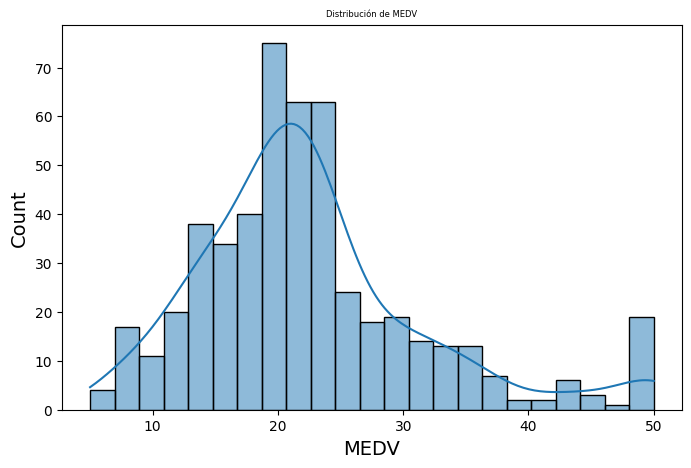

In [7]:

# 3. Análisis gráfico de la variable target

plt.figure(figsize=(8,5))
sns.histplot(df_boston["MEDV"], kde=True)
plt.title("Distribución de MEDV")
plt.show()


¿Qué información sacamos?
1. Forma de la distribución
- Sesgo a la izquierda (asimetría negativa): hay muchos valores bajos y medios, pero pocos valores altos.
- Pico alrededor de 20–25: la mayoría de las viviendas tienen precios en ese rango.
- Cola corta hacia valores altos: pocos casos con precios elevados.

2. Presencia de tope artificial
- Se observa un corte brusco en 50 → muchas viviendas tienen MEDV = 50.
- Esto sugiere que el dataset está topado (capped), probablemente por diseño.
- Implicación: el modelo no podrá predecir valores superiores a 50, aunque en la realidad puedan existir.

3. Justificación del tipo de modelado
- MEDV es una variable continua, no categórica.
- Aunque no es perfectamente normal, su distribución es suficientemente suave para aplicar regresión lineal.

4. Impacto en métricas
- El sesgo y el tope pueden afectar:
- MSE/RMSE: sensibles a outliers.
- R²: puede estar limitado si el modelo no puede predecir más allá del tope.
- Si quisieras mejorar la linealidad o reducir el sesgo, podrías aplicar una transformación logarítmica o cuadrática. Pero no es obligatorio: depende de cómo se comporten los residuos en el modelo.

- Ahora vamos a visualizar la variable target MEDV como seria su distribucion logaritmica.

¿Por qué hago esto?

- Para ver si la distribución se vuelve más simétrica o más normal.
- La regresión lineal no exige normalidad de la variable objetivo, pero una distribución muy sesgada puede afectar las métricas (como MSE).
- Si la transformación logarítmica mejora la forma, podrías considerar usar log(MEDV) como target en el modelo.

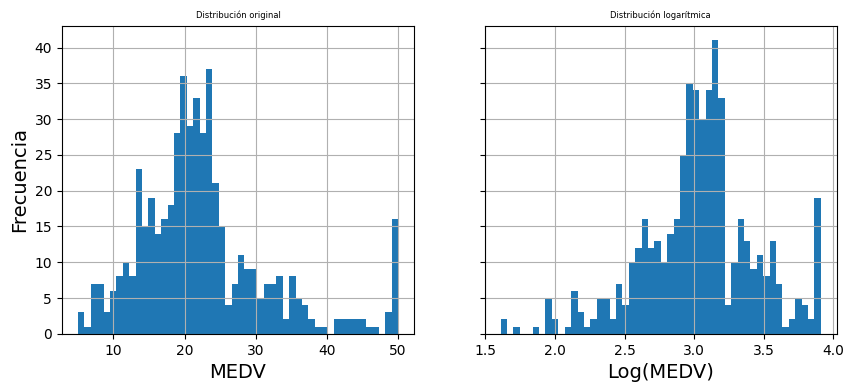

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

df_boston["MEDV"].hist(ax=axs[0], bins=50)
df_boston["MEDV"].apply(np.log).hist(ax=axs[1], bins=50)

axs[0].set_xlabel("MEDV")
axs[1].set_xlabel("Log(MEDV)")
axs[0].set_ylabel("Frecuencia")
axs[0].set_title("Distribución original")
axs[1].set_title("Distribución logarítmica")

plt.show()


La transformación logarítmica de MEDV mejora la simetría de la distribución y puede ayudar a estabilizar la varianza del modelo. Sin embargo, su impacto en el rendimiento predictivo debe evaluarse comparando métricas y residuos. En este caso, la mejora visual no garantiza una mejora sustancial en la capacidad de generalización del modelo.

**3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.**

- Tomamos un 80% para entrenar el modelo y un 20% para el test.
- Ponemos semilla en random para asegurar la reproducibilidad

In [ ]:
# 4. Train-test split

target = "MEDV"

features = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","LSTAT"
]

train_set, test_set = train_test_split(df_boston, test_size=0.2, random_state=42)

**4. Construye las parejas X,y de train y test**

Separo features y target para evitar fugas de informacion y facilitar el procesado.
- X: son las variables independientes(features) que el modelo usara para hacer predicciones
- y: es la variable dependeinte (Target) que el modelo intentara predecir

In [ ]:
# 4. Construyo X y para el entranimeinto y el test

X_train = train_set[features].copy()
y_train = train_set[target].copy()

X_test = test_set[features].copy()
y_test = test_set[target].copy()


**5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.**

- Vamos a ver la correlación de las varibales numericas entre si. Buscamos correlaciones fuertes con MEDV. 

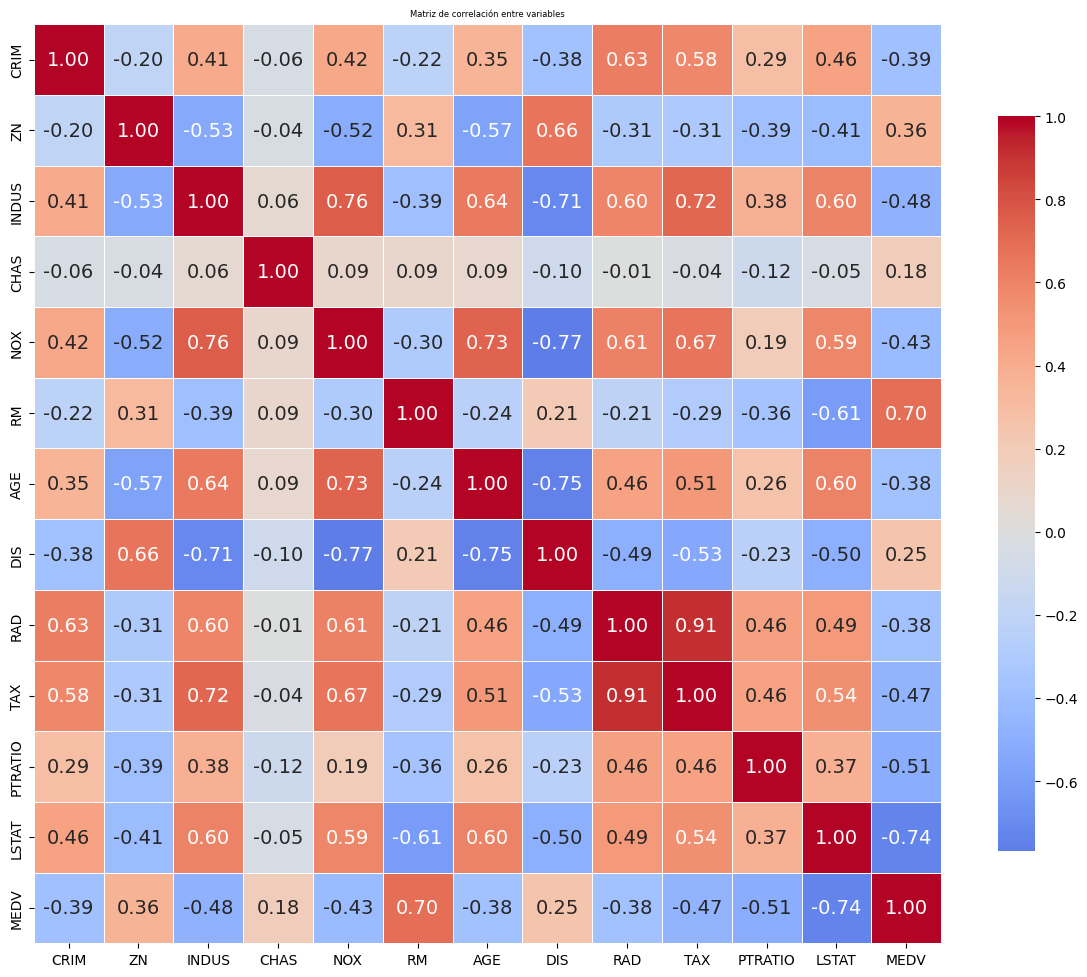

In [11]:
plt.figure(figsize=(12, 10))

corr_matrix = df_boston.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,          # ← muestra los números
    fmt=".2f",           # ← formato de los números
    cmap="coolwarm",
    center=0,
    linewidths=0.5,      # ← separadores entre celdas
    cbar_kws={"shrink": 0.8}
)

plt.title("Matriz de correlación entre variables")
plt.tight_layout()
plt.show()


Segun lo que observo en la grafica de correlacion:

**1. RM — Número medio de habitaciones por vivienda**
- Correlación con MEDV: +0.70 (la más alta positiva del dataset).
- Interpretación: A mayor número de habitaciones, mayor valor medio de la vivienda.

Motivo de selección:
- Representa una relación lineal fuerte y positiva.
- Es una de las variables más predictivas del precio.
- Permite mostrar un caso claro donde el scatterplot evidencia una tendencia ascendente.

**2. LSTAT — % de población de bajo estatus socioeconómico**
- Correlación con MEDV: –0.74 (la más fuerte del dataset).
- Interpretación: Zonas con mayor porcentaje de población de bajo estatus tienen viviendas más baratas.

Motivo de selección:

- Es la variable más correlacionada con el precio, pero en sentido negativo.
- Permite mostrar una relación descendente muy marcada.
- Es clave para entender el componente socioeconómico del precio.

**3. PTRATIO — Ratio alumno/profesor**
- Correlación con MEDV: –0.51 (moderada).
- Interpretación: Peores ratios educativos suelen asociarse a viviendas más baratas.

Motivo de selección:

- Representa una relación moderada, no tan clara como RM o LSTAT.
- Permite mostrar un scatterplot más disperso, útil para explicar que no todas las variables tienen relaciones fuertes.
- Añade la dimensión educativa al análisis.

**4. NOX — Concentración de óxidos de nitrógeno**
- Correlación con MEDV: –0.43 (moderada).
- Interpretación: Zonas más contaminadas tienden a tener viviendas más baratas.

Motivo de selección:

- Introduce la dimensión ambiental.
- Su relación con MEDV no es perfectamente lineal, lo que permite discutir posibles no linealidades.
- Es una variable relevante pero no dominante, ideal para mostrar variabilidad.

**5. DIS — Distancia ponderada a centros de empleo**
- Correlación con MEDV: +0.25 (débil).
- Interpretación: Las viviendas más alejadas de los centros de empleo tienden a tener precios ligeramente mayores.

Motivo de selección:

- Representa una relación débil, útil para mostrar que no todas las variables aportan la misma información.
- Permite explicar que algunas variables pueden tener efectos indirectos o interactuar con otras.
- Añade la dimensión geográfica al análisis.

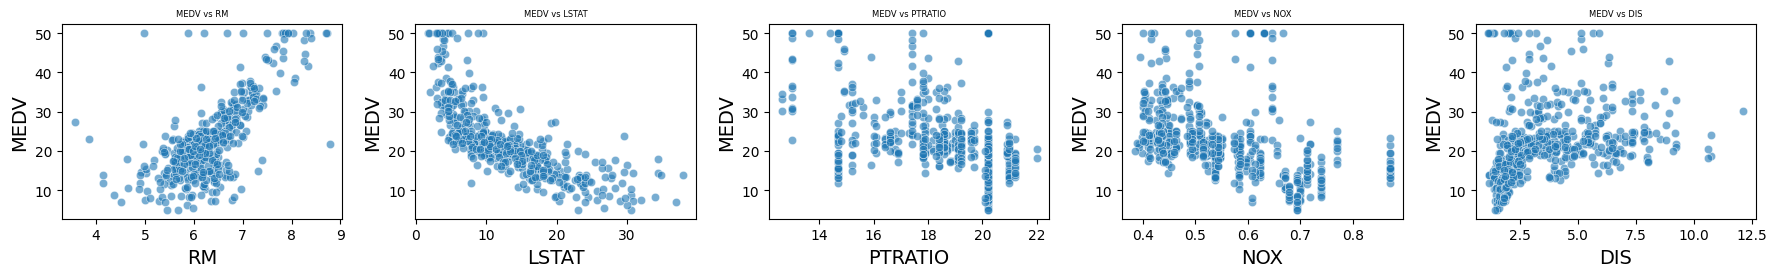

In [12]:
key_features = ["RM", "LSTAT", "PTRATIO", "NOX", "DIS"]

fig, axs = plt.subplots(1, len(key_features), figsize=(18, 3))

for ax, col in zip(axs, key_features):
    sns.scatterplot(
        data=df_boston,
        x=col,
        y="MEDV",
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f"MEDV vs {col}")

plt.tight_layout()
plt.show()


Segun lo ¡que veo en las graficas:

**1. MEDV vs RM (número medio de habitaciones)**
- Relación positiva clara: A más habitaciones, mayor precio.
- Distribución bastante lineal: Ideal para regresión lineal.
- Conclusión: RM es una variable predictiva fuerte y directa. Debe incluirse sí o sí.

**2. MEDV vs LSTAT (% población de bajo estatus socioeconómico)**
- Relación negativa fuerte: A mayor LSTAT, menor MEDV.
- Curva ligeramente no lineal: Podría mejorar con transformación, pero ya aporta mucho.
- Conclusión: LSTAT es una de las variables más informativas. Muy buena para regresión.

**3. MEDV vs PTRATIO (ratio alumno/profesor)**
- Relación débil o dispersa: No se observa una tendencia clara.
- Posible ruido: Puede aportar poco al modelo.
- Conclusión: Se puede mantener por ahora, pero su peso será bajo. Lasso podría eliminarla.

**4. MEDV vs NOX (contaminación del aire)**
- Relación negativa moderada: A más NOX, menor MEDV.
- Distribución algo curva: No es perfectamente lineal.
- Conclusión: NOX tiene valor predictivo, aunque podría beneficiarse de transformación o regularización.

**5. MEDV vs DIS (distancia a centros de empleo)**
- Relación poco clara: Dispersión alta, sin patrón evidente.
- Posible multicolinealidad con otras variables de accesibilidad (RAD, TAX).
- Conclusión: DIS podría aportar poco por sí sola, pero puede interactuar con otras. Ridge puede ayudar a estabilizar su efecto.

**Decisión de features**

- Para esta práctica, mantenemos todas las columnas listadas como features, por varios motivos:
- Son todas numéricas (no necesitamos one‑hot extra).
- Representan diferentes aspectos (socioeconómicos, accesibilidad, contaminación…).
- La regularización (Ridge/Lasso) ayudará si alguna aporta ruido.

**6. Trata las variables para que funcionen lo mejor posible en el modelo.**

La regresión lineal clásica no siempre requiere escalado para funcionar, pero:

- Para Ridge y Lasso es muy recomendable que las features estén en la misma escala, porque la penalización 
$[𝜆 \sum_{j=1}^{p} \lvert w_j \rvert]$ o $[𝜆\sum_{j=1}^{p} w_j^{2}]$ depende de las magnitudes de los coeficientes, y estas a su vez dependen de la escala de las variables.




In [13]:
# 6. Escalado de features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Razonamiento:

- fit_transform en train calcula media y desviación estándar y las aplica.

- transform en test usa los parámetros de train (nunca ajustamos el escalado con datos de test).

- Usaremos las versiones escaladas para los modelos (incluyendo el lineal simple, para comparar todo en condiciones homogéneas).

**7. Construye un modelo de regresión lineal.**

**Entrenamiento del modelo**

Entrenar es básicamente obtener el valor de los parámetros (en este caso de regresión lineal también les llamaremos pesos) a partir de los datos de train. En este caso mediante optimización con gradiente descendente del error cuadrático medio (para que se te quede la terminología). Ese entrenamiento es lo que esconde el método `fit` (ojo el método fit por dentro hará otras cosas en otro tipo de modelos, sólo que Sklearn tiene la gracia de mantener la sintáxis independientmente del tipo de algoritmo y modelo)

In [ ]:
# 7. Modelo de regresión lineal, aqui lo creo y lo entreno una cosa en cada linea

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Razonamiento:

- LinearRegression ajusta un modelo de la forma:

$$y = w_0 + w_1x_1 + w_2x_2 + ...$$

- fit: encuentra los coeficientes w que minimizan el MSE (Error cuadratico medio) en train.

**8. Analiza si lo crees conveniente los pesos y la importancia de las features.**

In [15]:
# Coeficientes del modelo
coef_df = pd.DataFrame({
    "feature": features,
    "coeficiente": lin_reg.coef_
}).sort_values(by="coeficiente", ascending=False)

coef_df


,feature,coeficiente
5,RM,3.004420
8,RAD,2.058898
3,CHAS,0.787152
1,ZN,0.712109
2,INDUS,0.173858
6,AGE,-0.100500
0,CRIM,-1.127473
9,TAX,-1.871317
10,PTRATIO,-1.991871
4,NOX,-2.137599


Razonamiento:

- Como hemos escalado las variables, los coeficientes son comparables entre sí:
un coeficiente mayor en valor absoluto indica una mayor influencia de esa feature sobre MEDV (en términos lineales).

- Coeficiente positivo: al aumentar la variable, aumenta MEDV (manteniendo el resto constante).

- Coeficiente negativo: lo contrario.

Podemos visualizarlo:

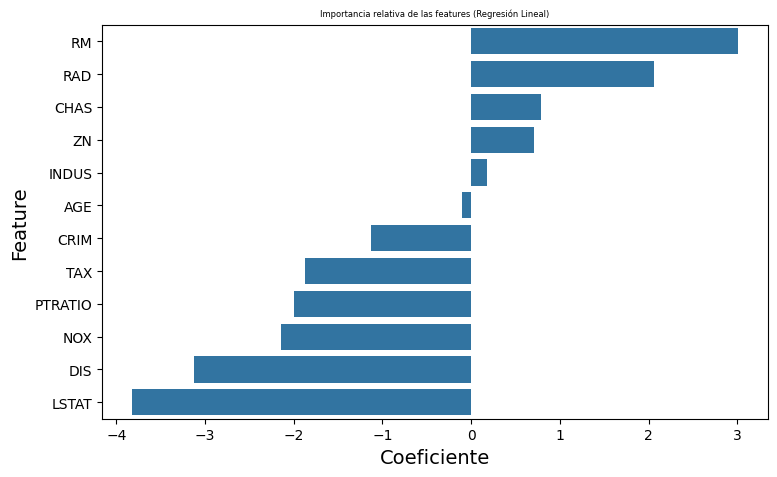

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=coef_df,
    x="coeficiente",
    y="feature",
    orient="h"
)
plt.title("Importancia relativa de las features (Regresión Lineal)")
plt.xlabel("Coeficiente")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



**9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.**

**MAE — Mean Absolute Error (Error Absoluto Medio)**

¿Qué mide?
- El promedio de los errores absolutos.

$$[MAE] = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y}_i \rvert$$

Interpretación: 
- Es fácil de entender: “de media, el modelo se equivoca X unidades”.
- Penaliza igual errores grandes y pequeños.
- Es robusto frente a outliers.

**MSE — Mean Squared Error (Error Cuadrático Medio)**

¿Qué mide?
- El promedio de los errores al cuadrado.

$$[MSE] = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Interpretación
- Penaliza mucho los errores grandes (por el cuadrado).
- Es la función de pérdida estándar en regresión lineal.

**RMSE — Root Mean Squared Error (Raíz del MSE)**

¿Qué mide?
- La raíz cuadrada del MSE.

$$[RMSE] = \sqrt{MSE}$$

Interpretación
- Vuelve a la misma escala que MEDV, por eso es más interpretable.
- Penaliza errores grandes igual que MSE.

**R² — Coeficiente de determinación**

¿Qué mide?
- El porcentaje de variabilidad de MEDV explicado por el modelo.

$$[R^2] = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Interpretación
- 1 → modelo perfecto
- 0 → el modelo no explica nada
- < 0 → peor que predecir la media



In [ ]:
# 9. Evaluación del modelo lineal

y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

def evaluar_modelo(y_true, y_pred, nombre="modelo"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Resultados para {nombre}:")
    print(f"  MAE  : {mae:.3f}")
    print(f"  MSE  : {mse:.3f}")
    print(f"  RMSE : {rmse:.3f}")
    print(f"  R^2  : {r2:.3f}")
    print("-" * 40)
    
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

metricas_train_lin = evaluar_modelo(y_train, y_train_pred, "Regresión lineal (train)")
metricas_test_lin = evaluar_modelo(y_test, y_test_pred, "Regresión lineal (test)")


Resultados para Regresión lineal (train):
  MAE  : 3.424
  MSE  : 22.604
  RMSE : 4.754
  R^2  : 0.740
----------------------------------------
Resultados para Regresión lineal (test):
  MAE  : 3.111
  MSE  : 22.778
  RMSE : 4.773
  R^2  : 0.689
----------------------------------------



- Si el rendimiento en train es mucho mejor que en test → posible overfitting.
- Si ambos son malos → posible underfitting o modelo demasiado simple.



Comparamos train y test:
1. El modelo generaliza bien (no hay overfitting)

La diferencia entre train y test es pequeña, lo que indica:
- El modelo no memoriza los datos de entrenamiento.
- El rendimiento en datos nuevos es muy parecido.
- No hay señales de overfitting.

2. El modelo tiene una capacidad explicativa razonablemente buena

- R²_train = 0.740 → el modelo explica el 74% de la variabilidad del precio en entrenamiento.
- R²_test = 0.689 → explica el 69% en test.

Esto significa:

- El modelo captura gran parte de la relación entre las variables y el precio.
- La caída del 74% al 69% es normal y esperable.
- Para ser un modelo lineal simple, el rendimiento es sólido.

3. Los errores son moderados y estables
- MAE ≈ 3.1–3.4 → el modelo se equivoca de media en 3 puntos de MEDV.
- RMSE ≈ 4.7 → el error típico es de unos 4.7 puntos.

Esto indica:

- El modelo comete errores razonables para este dataset.
- No hay grandes desviaciones entre train y test.
- El comportamiento es estable y consistente.

4. No hay underfitting
Si hubiera underfitting veríamos:

- R² muy bajo en train y test
- Errores muy altos en ambos

Pero aquí:

- R²_train = 0.740 → alto

- R²_test = 0.689 → bueno

Errores moderados

- Por tanto, el modelo sí captura la estructura del problema.

Conclusión:

- El modelo de regresión lineal presenta un rendimiento equilibrado entre los conjuntos de entrenamiento y test, lo que indica una buena capacidad de generalización sin signos de overfitting. El coeficiente R² muestra que el modelo explica entre el 69% y el 74% de la variabilidad del precio de la vivienda, lo cual es un resultado sólido para un modelo lineal. Las métricas de error (MAE y RMSE) son moderadas y muy similares entre train y test, confirmando que el modelo es estable y adecuado para este problema.

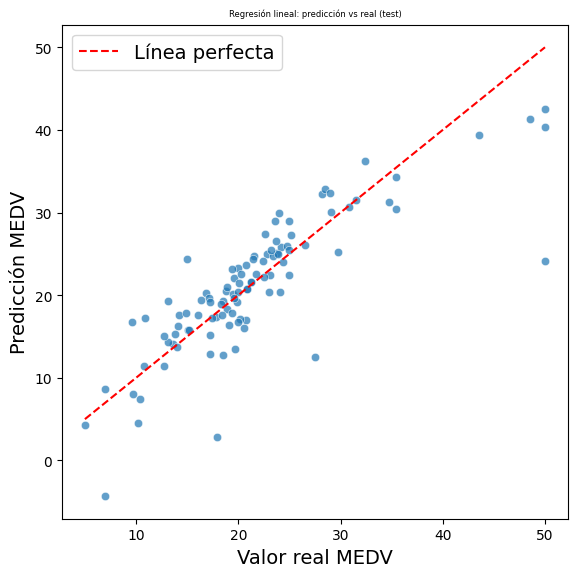

In [18]:
# Predicciones vs valores reales en test
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Línea perfecta")
plt.xlabel("Valor real MEDV")
plt.ylabel("Predicción MEDV")
plt.title("Regresión lineal: predicción vs real (test)")
plt.legend()
plt.tight_layout()
plt.show()


Razonamiento:

- Si los puntos se alinean cerca de la diagonal, el modelo predice razonablemente bien.
- Desviaciones fuertes indican errores grandes en ciertas zonas de precios.

Esta línea representa el caso ideal:

$[\hat{y}_i = y_i]$

Es decir, si el modelo fuera perfecto, todos los puntos caerían sobre esta línea.

Cada punto azul representa una vivienda: su valor real vs el valor predicho.

- Eje X → y_test → Valores reales de MEDV
- Eje Y → y_test_pred → Predicciones del modelo

1. Precisión del modelo
- Si los puntos están cerca de la línea → el modelo predice bien.
- Si están dispersos → hay errores significativos.

2. Simetría y sesgo
- Si los puntos están sistemáticamente por encima → el modelo subestima.
- Si están por debajo → el modelo sobrestima.

3. Comportamiento en extremos
- En Boston Housing, los valores altos de MEDV (cerca de 50) suelen estar mal predichos.
- Este gráfico permite detectar si el modelo pierde precisión en valores altos o bajos.

4. Outliers
- Puntos muy alejados de la línea indican observaciones difíciles de predecir.
- Posibles outliers o casos atípicos.

Conclusión:
- El gráfico de dispersión entre los valores reales (y_test) y las predicciones (y_test_pred) permite evaluar visualmente la calidad del modelo. La cercanía de los puntos a la línea roja discontinua indica un buen ajuste. En este caso, se observa una nube de puntos relativamente alineada con la diagonal, lo que sugiere que el modelo de regresión lineal generaliza correctamente en el conjunto de test, sin sesgos evidentes ni errores sistemáticos graves.

Ahora vamos a visualizar los residuos:

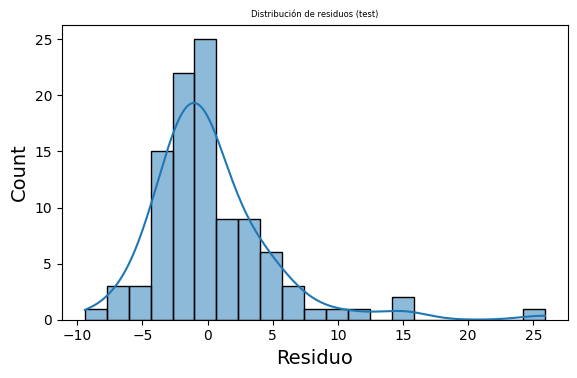

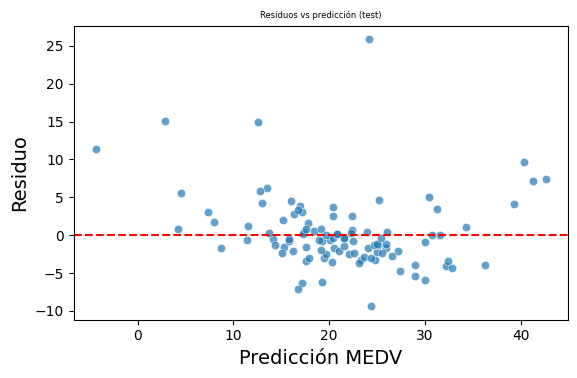

In [19]:
# Residuos: y_real - y_pred
residuos = y_test - y_test_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuos, kde=True)
plt.title("Distribución de residuos (test)")
plt.xlabel("Residuo")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuos, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicción MEDV")
plt.ylabel("Residuo")
plt.title("Residuos vs predicción (test)")
plt.tight_layout()
plt.show()


Razonamiento:

- Queremos residuos centrados alrededor de 0 y sin patrones claros.
- Si ves estructura (por ejemplo, residuos más positivos para precios altos), el modelo lineal podría estar infracapturando no linealidades.

Conclusion: 
- El gráfico de residuos frente a las predicciones muestra una distribución aproximadamente aleatoria y centrada en torno a cero, lo que indica que el modelo de regresión lineal no presenta sesgo sistemático y capta adecuadamente la relación entre las variables. La dispersión de los residuos es relativamente constante, aunque se observa una ligera mayor variabilidad en las predicciones más altas, lo que podría sugerir una leve heterocedasticidad. En conjunto, el comportamiento de los residuos respalda la validez del modelo.

**10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.**

Ridge y Lasso no son modelos distitnos, es exactamente la misma regresión lineal, pero con un término extra que penaliza los coeficientes para evitar problemas como:

- sobreajuste
- coeficientes inestables
- multicolinealidad
- modelos demasiado complejos

Es decir:

- Regresión lineal = modelo base  
- Ridge = regresión lineal + penalización L2  
- Lasso = regresión lineal + penalización L1

No cambian la estructura del modelo, solo cómo se ajustan los coeficientes.

In [20]:
# 9. Regularización: Ridge

alphas_ridge = [0.1, 1.0, 10.0]
resultados_ridge = []

for alpha in alphas_ridge:
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_reg.fit(X_train_scaled, y_train)
    
    y_train_pred_ridge = ridge_reg.predict(X_train_scaled)
    y_test_pred_ridge = ridge_reg.predict(X_test_scaled)
    
    print(f"--- Ridge (alpha={alpha}) ---")
    metricas_train = evaluar_modelo(y_train, y_train_pred_ridge, f"Ridge (train, alpha={alpha})")
    metricas_test = evaluar_modelo(y_test, y_test_pred_ridge, f"Ridge (test, alpha={alpha})")
    
    resultados_ridge.append({
        "alpha": alpha,
        "train": metricas_train,
        "test": metricas_test,
        "modelo": ridge_reg
    })


--- Ridge (alpha=0.1) ---
Resultados para Ridge (train, alpha=0.1):
  MAE  : 3.424
  MSE  : 22.604
  RMSE : 4.754
  R^2  : 0.740
----------------------------------------
Resultados para Ridge (test, alpha=0.1):
  MAE  : 3.111
  MSE  : 22.781
  RMSE : 4.773
  R^2  : 0.689
----------------------------------------
--- Ridge (alpha=1.0) ---
Resultados para Ridge (train, alpha=1.0):
  MAE  : 3.420
  MSE  : 22.606
  RMSE : 4.755
  R^2  : 0.740
----------------------------------------
Resultados para Ridge (test, alpha=1.0):
  MAE  : 3.107
  MSE  : 22.811
  RMSE : 4.776
  R^2  : 0.689
----------------------------------------
--- Ridge (alpha=10.0) ---
Resultados para Ridge (train, alpha=10.0):
  MAE  : 3.400
  MSE  : 22.694
  RMSE : 4.764
  R^2  : 0.739
----------------------------------------
Resultados para Ridge (test, alpha=10.0):
  MAE  : 3.086
  MSE  : 23.093
  RMSE : 4.805
  R^2  : 0.685
----------------------------------------




- Ridge añade una penalización:

$$\lambda \sum_{j=0}^{p} w_j^2$$

- Esta penalización tiende a reducir la magnitud de los coeficientes, pero no los lleva exactamente a cero. Esto resulta útil especialmente en presencia de multicolinealidad, ya que reduce la varianza del modelo sin eliminar variables.

- Para evaluar su rendimiento, comparamos el R² y los errores en test frente al modelo lineal simple. Esto permite verificar si la regularización aporta mejoras en capacidad de generalización.

In [21]:
# 9. Regularización: Lasso

alphas_lasso = [0.001, 0.01, 0.1]
resultados_lasso = []

for alpha in alphas_lasso:
    lasso_reg = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_reg.fit(X_train_scaled, y_train)
    
    y_train_pred_lasso = lasso_reg.predict(X_train_scaled)
    y_test_pred_lasso = lasso_reg.predict(X_test_scaled)
    
    print(f"--- Lasso (alpha={alpha}) ---")
    metricas_train = evaluar_modelo(y_train, y_train_pred_lasso, f"Lasso (train, alpha={alpha})")
    metricas_test = evaluar_modelo(y_test, y_test_pred_lasso, f"Lasso (test, alpha={alpha})")
    
    resultados_lasso.append({
        "alpha": alpha,
        "train": metricas_train,
        "test": metricas_test,
        "modelo": lasso_reg
    })


--- Lasso (alpha=0.001) ---
Resultados para Lasso (train, alpha=0.001):
  MAE  : 3.424
  MSE  : 22.604
  RMSE : 4.754
  R^2  : 0.740
----------------------------------------
Resultados para Lasso (test, alpha=0.001):
  MAE  : 3.111
  MSE  : 22.784
  RMSE : 4.773
  R^2  : 0.689
----------------------------------------
--- Lasso (alpha=0.01) ---
Resultados para Lasso (train, alpha=0.01):
  MAE  : 3.420
  MSE  : 22.611
  RMSE : 4.755
  R^2  : 0.740
----------------------------------------
Resultados para Lasso (test, alpha=0.01):
  MAE  : 3.105
  MSE  : 22.854
  RMSE : 4.781
  R^2  : 0.688
----------------------------------------
--- Lasso (alpha=0.1) ---
Resultados para Lasso (train, alpha=0.1):
  MAE  : 3.395
  MSE  : 23.089
  RMSE : 4.805
  R^2  : 0.734
----------------------------------------
Resultados para Lasso (test, alpha=0.1):
  MAE  : 3.168
  MSE  : 24.414
  RMSE : 4.941
  R^2  : 0.667
----------------------------------------


- Lasso añade la penalizacion:
$$\lambda \sum_{j=0}^{p} |w_j|$$
- La regresión de Lasso elimina los pesos de las variables menos importantes, como en el ejemplo donde pone a cero los coeficientes de los términos de grado alto en una regresión polinómica.
Esto se considera una forma de selección de variables (feature selection).

- Sin embargo, en presencia de correlaciones entre las variables, Lasso puede mostrar comportamientos inestables, ya que tiende a seleccionar solo una de las variables correlacionadas y descartar el resto.

Visualizacion de coeficientes para un modelo regularizado 

**11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?**

Me quedo con la Regresion lineal por lo siguiente:

- Tiene el mismo RMSE y R² que los mejores Ridge.
- No sufre degradación como Lasso cuando aumenta alpha.
- No introduce penalizaciones innecesarias.
- Es el modelo más simple y, según el principio de parsimonia, si un modelo simple rinde igual que uno más complejo, se elige el simple.

Comparacion:

Regresión lineal:

- RMSE test: 4.773
- R² test: 0.689
- Modelo estable, sin sobreajuste, sin necesidad de regularización.

Ridge:

- RMSE test: entre 4.773 y 4.805
- R² test: entre 0.689 y 0.685
- No mejora nada respecto a la lineal.
- Solo añade complejidad sin beneficio.

Lasso:

- RMSE test: entre 4.773 y 4.941
- R² test: entre 0.689 y 0.667
- Con alpha alto se degrada mucho.
- Está eliminando variables útiles.

Conclusión razonada
- Me quedo con la regresión lineal, porque ofrece el mejor equilibrio entre simplicidad y rendimiento.
- Ridge no aporta mejoras y Lasso incluso empeora el modelo cuando alpha aumenta.
- Esto indica que no existe sobreajuste en el modelo original y que la regularización no es necesaria.

Para agrupar todo y ver todos los resultados juntos escribo el siguiente codigo:

In [4]:
import pandas as pd

data = [
    ["Lineal", None, 3.424, 22.604, 4.754, 0.740, 3.111, 22.778, 4.773, 0.689],

    ["Ridge", 0.1, 3.424, 22.604, 4.754, 0.740, 3.111, 22.781, 4.773, 0.689],
    ["Ridge", 1.0, 3.420, 22.606, 4.755, 0.740, 3.107, 22.811, 4.776, 0.689],
    ["Ridge", 10.0, 3.400, 22.694, 4.764, 0.739, 3.086, 23.093, 4.805, 0.685],

    ["Lasso", 0.001, 3.424, 22.604, 4.754, 0.740, 3.111, 22.784, 4.773, 0.689],
    ["Lasso", 0.01, 3.420, 22.611, 4.755, 0.740, 3.105, 22.854, 4.781, 0.688],
    ["Lasso", 0.1, 3.395, 23.089, 4.805, 0.734, 3.168, 24.414, 4.941, 0.667],
]

df = pd.DataFrame(data, columns=[
    "Modelo", "Alpha",
    "MAE (train)", "MSE (train)", "RMSE (train)", "R² (train)",
    "MAE (test)", "MSE (test)", "RMSE (test)", "R² (test)"
])

df


,Modelo,Alpha,MAE (train),MSE (train),RMSE (train),R² (train),MAE (test),MSE (test),RMSE (test),R² (test)
0,Lineal,NaN,3.424,22.604,4.754,0.740,3.111,22.778,4.773,0.689
1,Ridge,0.100,3.424,22.604,4.754,0.740,3.111,22.781,4.773,0.689
2,Ridge,1.000,3.420,22.606,4.755,0.740,3.107,22.811,4.776,0.689
3,Ridge,10.000,3.400,22.694,4.764,0.739,3.086,23.093,4.805,0.685
4,Lasso,0.001,3.424,22.604,4.754,0.740,3.111,22.784,4.773,0.689
5,Lasso,0.010,3.420,22.611,4.755,0.740,3.105,22.854,4.781,0.688
6,Lasso,0.100,3.395,23.089,4.805,0.734,3.168,24.414,4.941,0.667


Las sigueintes graficas muestran lo sigueinte:

Gráfica 1: RMSE según alpha (Ridge y Lasso):
- Representa cómo cambia el error de predicción (RMSE) cuando se modifica el parámetro de regularización alpha en los modelos Ridge y Lasso.
- La gráfica incluye una línea horizontal que muestra el RMSE del modelo lineal sin regularización, que sirve como referencia para comparar el efecto de la regularización.

Gráfica 2: R² según alpha (Ridge y Lasso):
- De forma análoga, esta gráfica muestra cómo varía el coeficiente de determinación (R²) en función del valor de alpha para los modelos Ridge y Lasso.
- También incorpora una línea horizontal con el valor de R² del modelo lineal, permitiendo evaluar si la regularización mejora o empeora la capacidad explicativa del modelo.

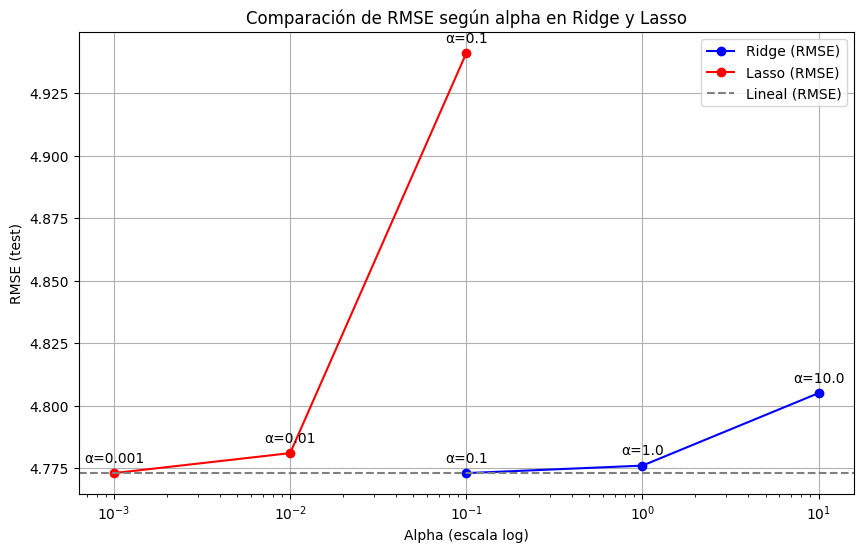

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
alpha_ridge = [0.1, 1.0, 10.0]
rmse_ridge = [4.773, 4.776, 4.805]

alpha_lasso = [0.001, 0.01, 0.1]
rmse_lasso = [4.773, 4.781, 4.941]

# Modelo lineal (referencia)
rmse_lineal = 4.773

plt.figure(figsize=(10,6))

# Ridge
plt.plot(alpha_ridge, rmse_ridge, marker='o', label="Ridge (RMSE)", color="blue")
for x, y in zip(alpha_ridge, rmse_ridge):
    plt.annotate(f"α={x}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

# Lasso
plt.plot(alpha_lasso, rmse_lasso, marker='o', label="Lasso (RMSE)", color="red")
for x, y in zip(alpha_lasso, rmse_lasso):
    plt.annotate(f"α={x}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

# Línea horizontal para el modelo lineal
plt.axhline(rmse_lineal, color="gray", linestyle="--", label="Lineal (RMSE)")

plt.xscale("log")  # escala logarítmica para alpha
plt.xlabel("Alpha (escala log)")
plt.ylabel("RMSE (test)")
plt.title("Comparación de RMSE según alpha en Ridge y Lasso")
plt.legend()
plt.grid(True)
plt.show()


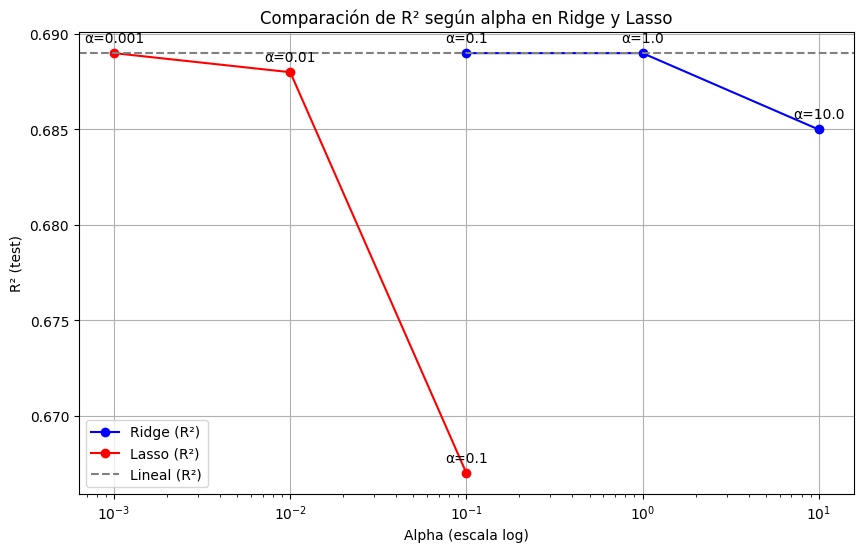

In [10]:
import matplotlib.pyplot as plt

# Datos
alpha_ridge = [0.1, 1.0, 10.0]
r2_ridge = [0.689, 0.689, 0.685]

alpha_lasso = [0.001, 0.01, 0.1]
r2_lasso = [0.689, 0.688, 0.667]

# Modelo lineal
r2_lineal = 0.689

plt.figure(figsize=(10,6))

# Ridge
plt.plot(alpha_ridge, r2_ridge, marker='o', label="Ridge (R²)", color="blue")
for x, y in zip(alpha_ridge, r2_ridge):
    plt.annotate(f"α={x}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

# Lasso
plt.plot(alpha_lasso, r2_lasso, marker='o', label="Lasso (R²)", color="red")
for x, y in zip(alpha_lasso, r2_lasso):
    plt.annotate(f"α={x}", (x, y), textcoords="offset points", xytext=(0,8), ha='center')

# Línea horizontal para el modelo lineal
plt.axhline(r2_lineal, color="gray", linestyle="--", label="Lineal (R²)")

plt.xscale("log")
plt.xlabel("Alpha (escala log)")
plt.ylabel("R² (test)")
plt.title("Comparación de R² según alpha en Ridge y Lasso")
plt.legend()
plt.grid(True)
plt.show()
